# Training Classifiers for ESG Ratings

In [1]:
from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
workspace_dir = "/workspace"
project_name = "ekorpkit-book/exmaples"
task_name = "esg"
ws = eKonf.set_workspace(workspace=workspace_dir, project=project_name, task=task_name)
print("project_dir:", ws.project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Set environment variable EKORPKIT_PROJECT_ROOT=/workspace/projects/ekorpkit-book
INFO:ekorpkit.base:Set environment variable EKORPKIT_PROJECT_NAME=ekorpkit-book/exmaples
INFO:ekorpkit.base:Set environment variable EKORPKIT_PROJECT_ROOT=/workspace/projects/ekorpkit-book/exmaples
INFO:ekorpkit.base:Set environment variable EKORPKIT_TASK_NAME=esg


version: 0.1.40.post0.dev54
is colab? False


INFO:ekorpkit.base:Set environment variable EKORPKIT_DATA_ROOT=/workspace/data
INFO:ekorpkit.base:Set environment variable CACHED_PATH_CACHE_ROOT=/workspace/.cache/cached_path


project_dir: /workspace/projects/ekorpkit-book/exmaples
time: 934 ms (started: 2022-12-14 11:30:00 +00:00)


## Preparing `esg_polarity_kr` dataset

In [7]:
from ekorpkit.datasets.dataset import Dataset

ds_cfg = eKonf.compose("dataset=dataset")
ds_cfg.name = 'esg_polarity_kr'
ds_cfg.data_dir = ds_cfg.path.data_dir
# ds = eKonf.instantiate(ds_cfg)
# eKonf.print(ds_cfg)
ds = Dataset(**ds_cfg)
print(ds)

INFO:ekorpkit.datasets.base:Loaded info file: /workspace/projects/ekorpkit-book/exmaples/data/inputs/esg_polarity_kr/info-esg_polarity_kr.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/projects/ekorpkit-book/exmaples/data/inputs/esg_polarity_kr/esg_polarity_kr-train.parquet']
INFO:ekorpkit.io.file:Loading data from /workspace/projects/ekorpkit-book/exmaples/data/inputs/esg_polarity_kr/esg_polarity_kr-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'split'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['esg_polarity_kr-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/projects/ekorpkit-book/exmaples/data

Dataset : esg_polarity_kr
time: 1.36 s (started: 2022-12-14 11:33:34 +00:00)


In [8]:
ds.INFO

{'splits': {'train': {'data_file': 'esg_polarity_kr-train.parquet',
   'name': 'train',
   'num_examples': 8713,
   'num_bytes': 5631718,
   'num_bytes_median': 694.0,
   'num_bytes_max': 3196,
   'num_bytes_min': 28,
   'human_bytes': '5.37 MiB'},
  'test': {'data_file': 'esg_polarity_kr-test.parquet',
   'name': 'test',
   'num_examples': 2724,
   'num_bytes': 1764544,
   'num_bytes_median': 697.0,
   'num_bytes_max': 1893,
   'num_bytes_min': 77,
   'human_bytes': '1.68 MiB'},
  'dev': {'data_file': 'esg_polarity_kr-dev.parquet',
   'name': 'dev',
   'num_examples': 2179,
   'num_bytes': 1411447,
   'num_bytes_median': 696.0,
   'num_bytes_max': 3295,
   'num_bytes_min': 16,
   'human_bytes': '1.35 MiB'}},
 'num_examples': 13616,
 'size_in_bytes': 8807709,
 'size_in_human_bytes': '8.40 MiB',
 'data_files': {'train': 'esg_polarity_kr-train.parquet',
  'test': 'esg_polarity_kr-test.parquet',
  'dev': 'esg_polarity_kr-dev.parquet'},
 'meta_files': {},
 'data_files_modified': '2022-07-1

time: 2.68 ms (started: 2022-12-14 11:33:39 +00:00)


## Training a polarity classficiation model with `esg_polarity_kr` dataset

In [11]:
overrides=[
    '+model/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('task=simple.classification', overrides)
model_cfg.name = "esg_polarity"
# model_cfg.dataset = ds_cfg
model_cfg.trainer.num_train_epochs = 2
model_cfg.trainer.max_seq_length = 256
model_cfg.trainer.train_batch_size = 32
# model_cfg.trainer.eval_batch_size = 32
# model_cfg.labels = ['positive','neutral','negative']
eKonf.print(model_cfg)
# model_cfg

{'_target_': 'ekorpkit.models.transformer.SimpleClassification',
 'about': {'author': 'Young Joon Lee',
           'description': 'eKorpkit provides a flexible interface for NLP and '
                          'ML research pipelines such as extraction, '
                          'transformation, tokenization, training, and '
                          'visualization.',
           'name': 'ekorpkit',
           'version': '0.1.40.post0.dev54',
           'website': 'https://entelecheia.github.io/ekorpkit-book/'},
 'app_name': 'ekorpkit',
 'auto': {},
 'batch': {'batch_name': 'esg_polarity',
           'batch_num': None,
           'device': 'cpu',
           'num_devices': None,
           'num_workers': 1,
           'output_dir': '/workspace/projects/ekorpkit-book/exmaples/esg/nlp/outputs',
           'output_extention': None,
           'output_suffix': None,
           'pred_file': 'preds.parquet',
           'random_seed': True,
           'resume_latest': False,
           'resume

INFO:ekorpkit.base:Calling eval


  0%|          | 0/2724 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

Accuracy:  0.7415565345080763
Precison:  0.747426483301581
Recall:  0.7415565345080763
F1 Score:  0.7432338387288551
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    Negative       0.61      0.53      0.57       239
     Neutral       0.82      0.79      0.81      1805
    Positive       0.60      0.69      0.64       680

    accuracy                           0.74      2724
   macro avg       0.68      0.67      0.67      2724
weighted avg       0.75      0.74      0.74      2724



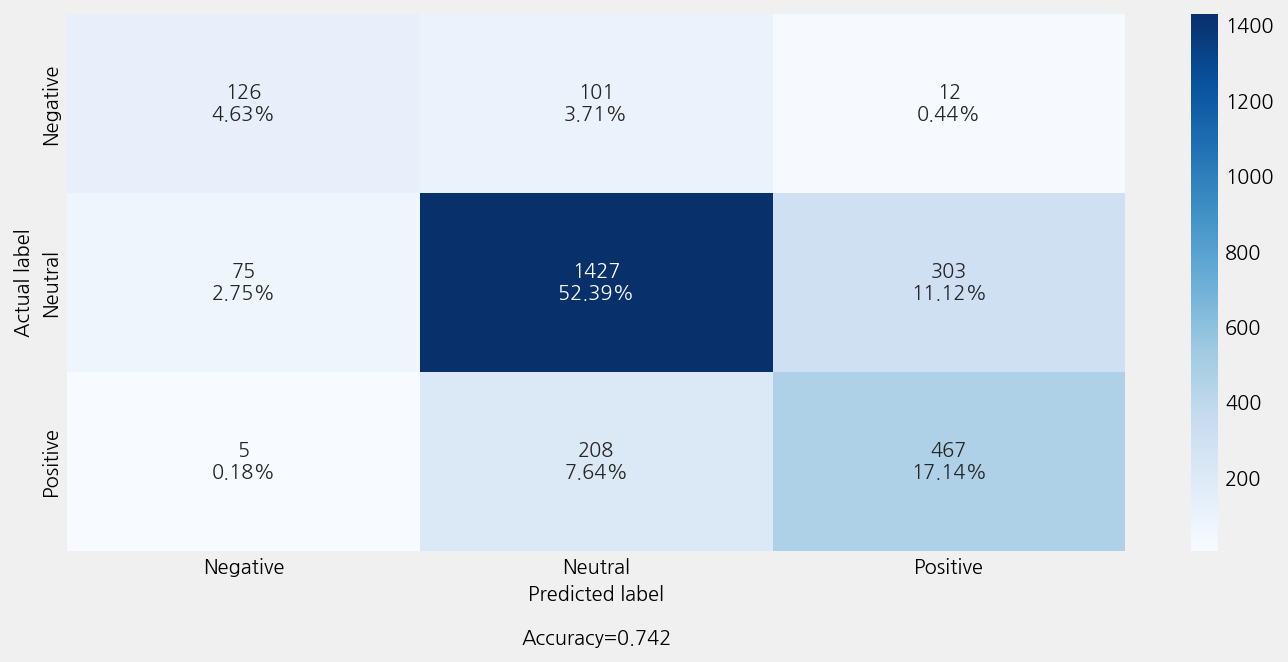

In [6]:
model_cfg._method_ = ['eval']
eKonf.instantiate(model_cfg)

## Preparing `esg_topics_improved` dataset

In [7]:
ds_cfg = eKonf.compose('dataset')
ds_cfg.name = 'esg_topics_improved'
ds_cfg.data_dir = '/workspace/data/datasets/simple'
ds = eKonf.instantiate(ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'S-소비자', 'E-환경혁신', 'S-사회공헌', 'S-고용', 'E-환경영향', 'E-기후변화', 'S-재해/안전관리']


## Training a category classficiation model with `esg_topics_improved` dataset

In [8]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.base:Calling train
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-disc

  0%|          | 0/8953 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/289 [00:00<?, ?it/s]

  0%|          | 0/1106 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/36 [00:00<?, ?it/s]

Training loss,█▇▄▄▄▂▂▁▄▃▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▄▅▆▆▇██
lr,█▇▇▆▅▄▄▃▂▂▁
mcc,▁█
train_loss,▁█
Training loss,0.37387
acc,0.77688
eval_loss,0.77565
global_step,578


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO:ekorpkit.base:Calling eval


  0%|          | 0/1106 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/36 [00:00<?, ?it/s]

Accuracy:  0.77124773960217
Precison:  0.772127422955764
Recall:  0.77124773960217
F1 Score:  0.7653639797849325
Model Report: 
___________________________________________________
                  precision    recall  f1-score   support

          E-기후변화       0.73      0.65      0.69        63
          E-환경영향       0.49      0.51      0.50        61
          E-환경혁신       0.66      0.77      0.71       102
   G-기업윤리/불공정/소송       0.65      0.55      0.60        91
          G-지배구조       0.82      0.87      0.84       172
            S-고용       0.87      0.91      0.89       156
S-기업(공급망)동반성장/상생       0.85      0.28      0.42        39
          S-사회공헌       0.77      0.87      0.81        68
           S-소비자       0.82      0.84      0.83       317
       S-재해/안전관리       0.79      0.70      0.74        37

        accuracy                           0.77      1106
       macro avg       0.74      0.69      0.70      1106
    weighted avg       0.77      0.77      0.77      1106



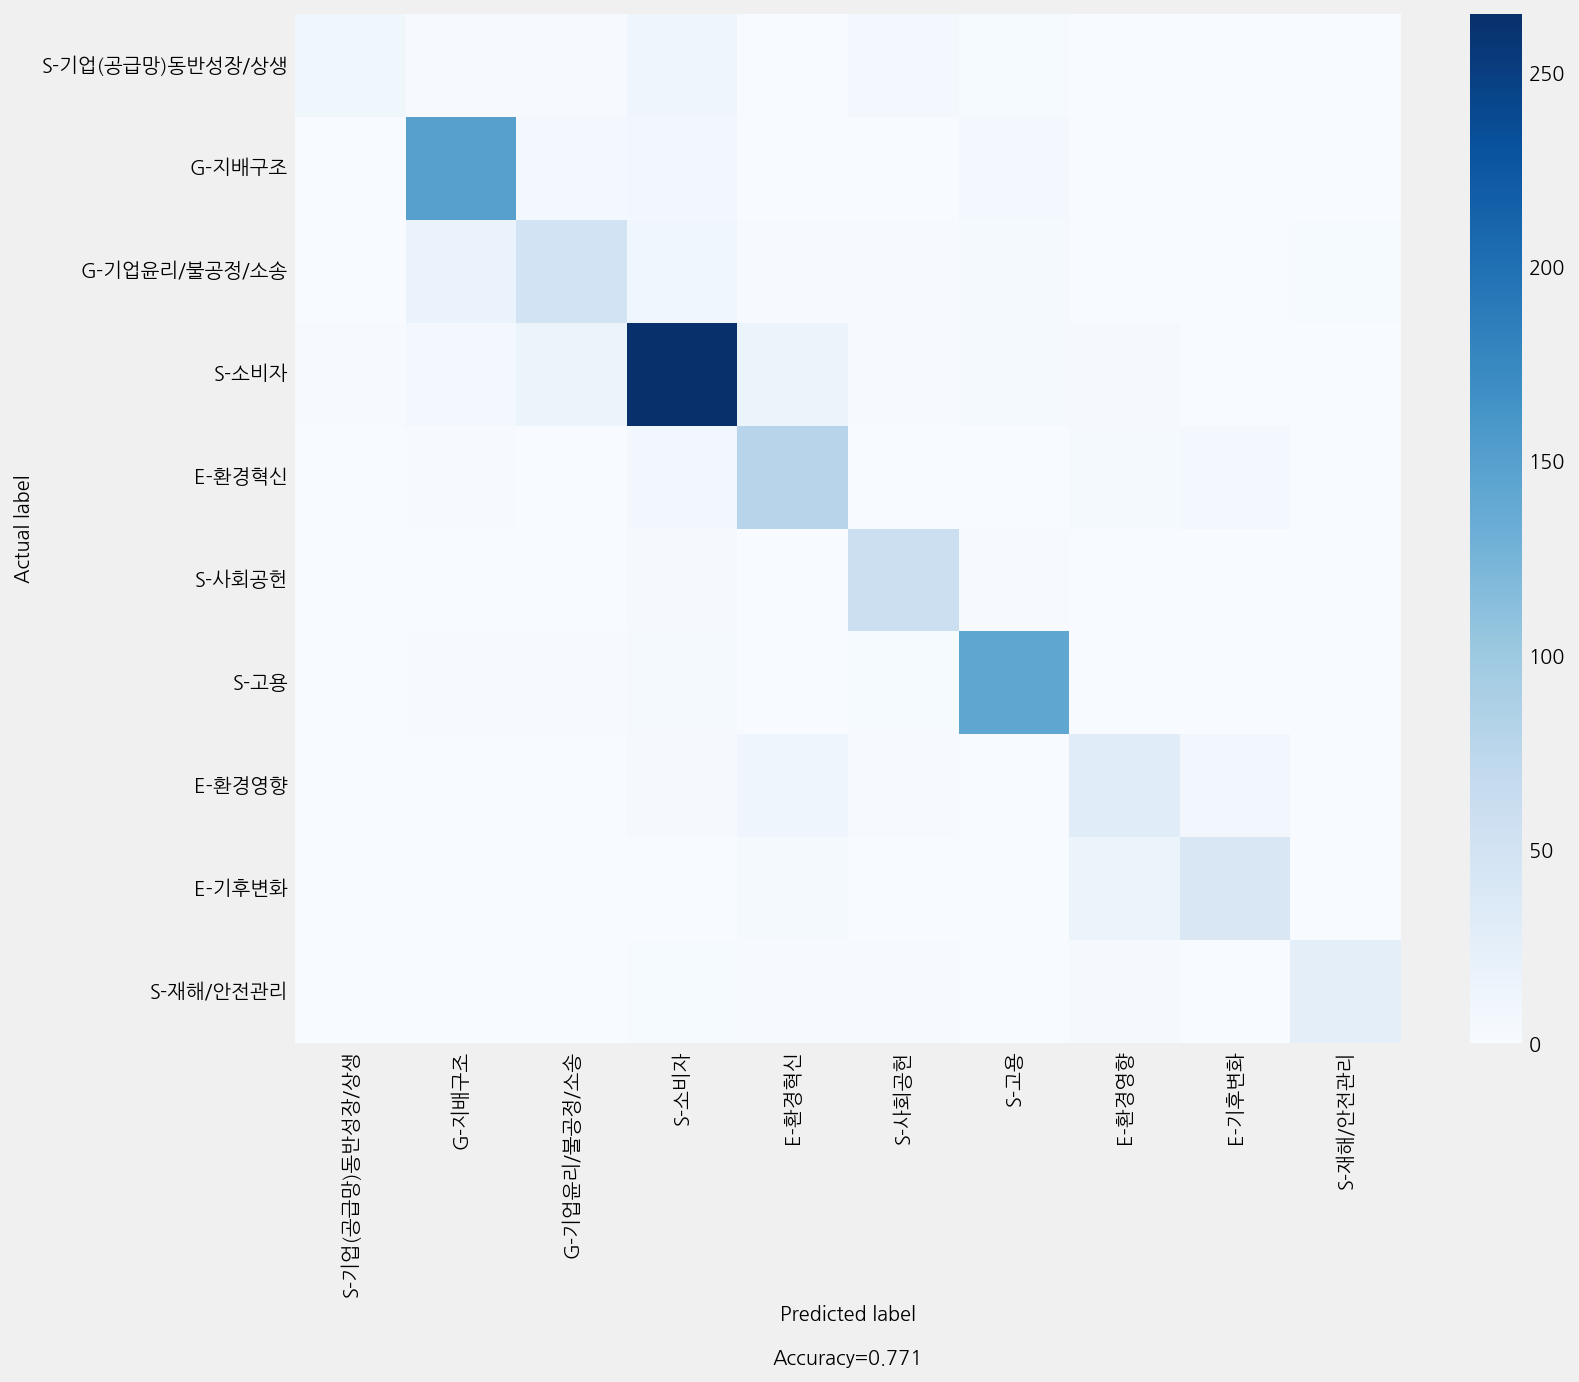

In [9]:
model_cfg._method_ = ['eval']
model_cfg.model.eval.visualize.plot.confusion_matrix.include_values = False
model_cfg.model.eval.visualize.plot.confusion_matrix.include_percentages = False
model_cfg.model.eval.visualize.plot.figure.figsize = (12,10)
eKonf.instantiate(model_cfg)